In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn

Prepare some non-linear shaped data as a function of a single variable

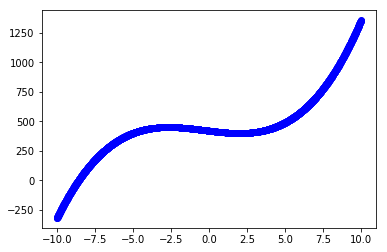

In [25]:
xarr = [ x/100 - 10 for x in range(2000) ] # from -10 to 10, 0.1 steps
yarr = [ (((x-2)**3 + 7*(x-2)**2 + 400)) for x in xarr ]

plt.scatter(xarr, yarr, color='blue')

# reshape for sklearn if your data only has a single example
#X_train = np.asarray(xarr).reshape(1, -1)
# or reshape if data has single feature:
X_train = np.asarray(xarr).reshape(-1, 1)


In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)


In [38]:
from sklearn.neural_network import MLPRegressor

hidden_layers = (4, )
#activation = 'relu'
activation = 'tanh'
#activation = 'identity'
regularization = 0.0001
max_iter = 10 * 1000
warm_start = False
learning_rate='constant'
#learning_rate = 'adaptive'

#nn = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation, alpha=regularization, max_iter=max_iter, warm_start=warm_start, solver='sgd', learning_rate=learning_rate, tol=1e-12, random_state=1234)
nn = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation, max_iter=max_iter)


/home/pbalm/miniconda3/envs/neuralnets/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


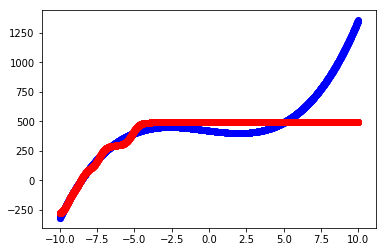

In [39]:
nn.fit(X_train, yarr)

y_pred = nn.predict(X_train)

plt.scatter(xarr, yarr, color='blue')
plt.scatter(xarr, y_pred, color='red')


In [11]:
nn.n_iter_

2275

In [12]:
nn

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
nn.intercepts_

[array([ 23.4775502]), array([ 22.48208766])]

In [17]:
nn.coefs_

[array([[ 2.3698002]]), array([[ 18.3433664]])]

In [440]:
nn.loss_

135021.61485702879

In [437]:
#squared_loss = sklearn.metrics.mean_squared_error(yarr, y_pred)
squared_loss = ((yarr - y_pred) ** 2).mean() / 2
squared_loss

1547.4110678542072

I think my loss function does not give the same result as the loss\_ parameter because it doesn't evaluate the same points?

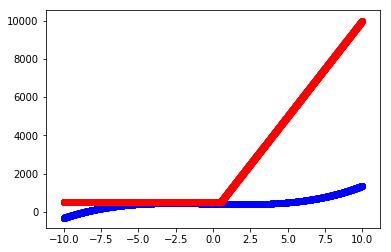

In [22]:
# tune something by hand
nn.intercepts_ = [np.array([-5]), np.array([500.])]
nn.coefs_ = [np.array([[10.]]), np.array([[100.]])]

y_pred = nn.predict(X_train)

plt.scatter(xarr, yarr, color='blue')
plt.scatter(xarr, y_pred, color='red')

In [138]:
squared_loss = np.linalg.norm(yarr - y_pred)
squared_loss

3283.9473643924321

In [340]:
nn

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1234,
       shuffle=True, solver='sgd', tol=1e-12, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [452]:
losses = []
for i in range(10):
    nn.fit(X_scaled, yarr)
    losses.append(nn.loss_)
    
losses.sort()

In [456]:
losses.sort()
losses

[9632.6542831268725,
 9637.4471533925516,
 9648.3762939959743,
 9656.0743096938877,
 9664.0157891645649,
 9669.9523768377767,
 9686.5937609535831,
 9693.5423830722048,
 9750.8958593802327,
 9756.0456168197743]

In [45]:
losses= [9632.6542831268725,
 9637.4471533925516,
 9648.3762939959743,
 9656.0743096938877,
 9664.0157891645649,
 9669.9523768377767,
 9686.5937609535831,
 9693.5423830722048,
 9750.8958593802327,
 9756.0456168197743]

(array([ 2.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  2.]),
 array([ 9632.65428313,  9644.9934165 ,  9657.33254987,  9669.67168323,
         9682.0108166 ,  9694.34994997,  9706.68908334,  9719.02821671,
         9731.36735008,  9743.70648345,  9756.04561682]),
 <a list of 10 Patch objects>)

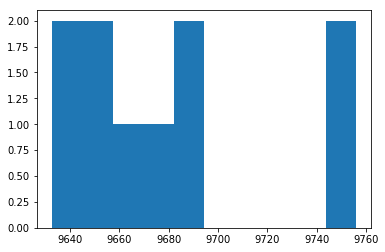

In [46]:
plt.hist(losses)